In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import sciPyFoam.polyMesh2d as mesh2d


In [3]:
caseDir='/home/anoldfriend/Workspace/MyRepo/openfoamWorkspace/scipyfoam/example/cases/blockMesh'  # case dir
fieldNames=['T','U']       # field name list
times,times_value=mesh2d.getTimes(caseDir)      # get all times name and value
print(f"times: {times}")
print(f"time values: {times_value}")



times: ['0' '6825600000']
time values: [0.0000e+00 6.8256e+09]


In [7]:
MeshData=mesh2d.getMesh(caseDir, 'frontAndBack')
MeshData


{'x': array([   0.,   20.,   40., ..., 1960., 1980., 2000.]),
 'y': array([-3000., -3000., -3000., ..., -2000., -2000., -2000.]),
 'z': array([0., 0., 0., ..., 1., 1., 1.]),
 'triangles': array([[   0,  101,  102],
        [   0,  102,    1],
        [   1,  102,  103],
        ...,
        [5047, 5149, 5048],
        [5048, 5149, 5150],
        [5048, 5150, 5049]]),
 'polygons': array([[   0,  101,  102,    1],
        [   1,  102,  103,    2],
        [   2,  103,  104,    3],
        ...,
        [5046, 5147, 5148, 5047],
        [5047, 5148, 5149, 5048],
        [5048, 5149, 5150, 5049]]),
 'validCells_index': array([ True,  True,  True, ...,  True,  True,  True]),
 'poly2tri': array([2, 2, 2, ..., 2, 2, 2]),
 'FieldData_usg': (vtkmodules.vtkCommonDataModel.vtkUnstructuredGrid)0x7f7b809220a0}

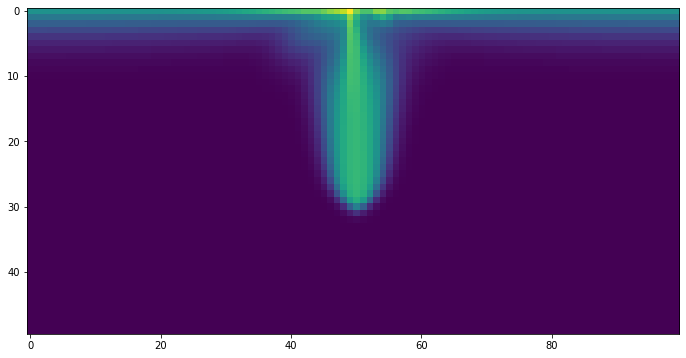

In [30]:
internalField_T=mesh2d.readField(caseDir,times[-1],'T','internalField').reshape(50,100)
fig,ax=plt.subplots(figsize=(14,6))
ax.imshow(internalField_T)


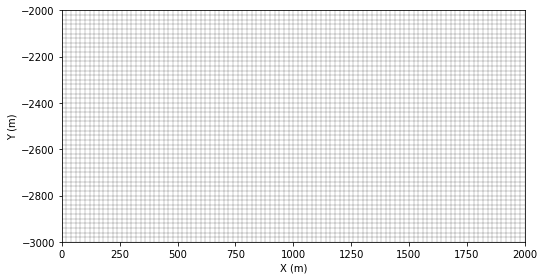

In [31]:
x=MeshData['x']
y=MeshData['y']
polygons=MeshData["polygons"]
figwidth=8
figheight=figwidth/(x.max()-x.min())*(y.max()-y.min())
fig=plt.figure(figsize=(figwidth,figheight))
ax=plt.gca()
ax.axis('scaled')
ax.set_xlim(x.min(),x.max())
ax.set_ylim(y.min(),y.max())
ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
for polygon in polygons:
    ax.plot(np.append(x[polygon],x[polygon[0]]),np.append(y[polygon],y[polygon[0]]),lw=0.1,color='k')
plt.tight_layout()

In [9]:
# read field data dict contains point data and cell data 
fieldData=mesh2d.readCellData_to_pointData(caseDir, times[-1], fieldNames,MeshData) 
fieldData

{'pointData': {'T': array([543.655 , 543.6517, 543.6434, ...,   0.    ,   0.    ,   0.    ],
        dtype=float32),
  'U_0': array([3.6839901e-10, 8.6014634e-10, 1.5994467e-09, ..., 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00], dtype=float32),
  'U_1': array([-3.9287401e-10, -3.9347667e-10, -3.9501066e-10, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00], dtype=float32),
  'U_2': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)},
 'cellData': {'U_0': array([3.68399e-10, 1.10602e-09, 1.84616e-09, ..., 3.85493e-12,
         2.30183e-12, 7.65422e-13]),
  'U_1': array([-3.92874e-10, -3.93778e-10, -3.95627e-10, ..., -1.88429e-09,
         -1.89042e-09, -1.89348e-09]),
  'U_2': array([0., 0., 0., ..., 0., 0., 0.])}}

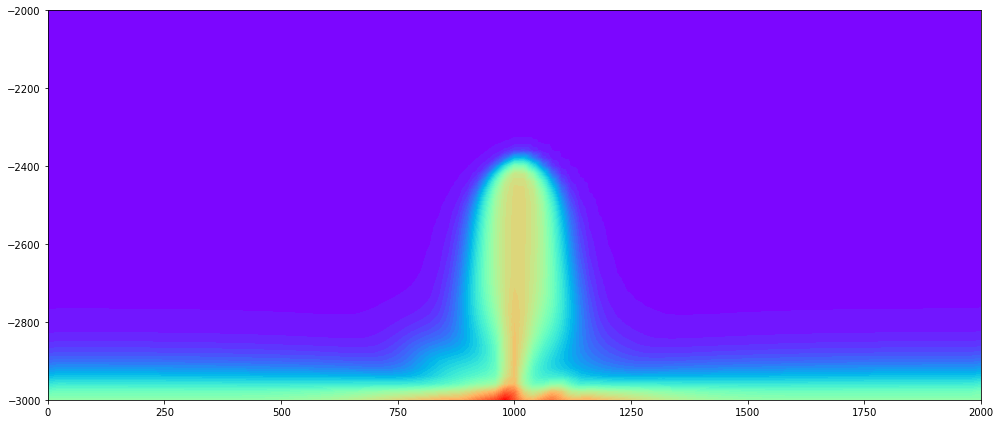

In [10]:
# Plot 
fig=plt.figure(figsize=(14,6))
ax=plt.gca()
ax.tricontourf(MeshData['x'],MeshData['y'],MeshData['triangles'],fieldData['pointData']['T'],levels=50,cmap='rainbow')
# ax.invert_yaxis()
plt.tight_layout()

In [14]:
len(fieldData['pointData']['T'])

10302

In [17]:
# read cellZones
owners=mesh2d.readOwner(caseDir)
cellZones=mesh2d.readCellZones(caseDir)
for cellZone in cellZones:
    print(cellZone)
owners


There is no cellZones in the case of blockMesh


array([   0,    0,    1, ..., 4799, 4899, 4999])

In [58]:
faces=mesh2d.readFaces(caseDir)
len(faces['index']) # composed of all the face polygons (point array) 

20150

In [60]:
cells=mesh2d.getCells(caseDir)
cell=np.array(cells[0])
print(f"cell: {cell}") #composed of face index
startFace=10150
endFaces=10000+startFace
validFaces=np.array(np.where((cell>=startFace)  & (cell<endFaces) ))[0]
firstValidFaces=cell[validFaces[0]] #have 2, one for front,the other for Back
polygonsOffirstValidFaces=faces['index'][firstValidFaces]
print(f"polygon of first valid face: {polygonsOffirstValidFaces}")

cell: [    0     1  9850 10050 10150 15150]
polygon of first valid face: [  0 101 102   1]


In [25]:
# read boundaries
boundaries=mesh2d.readBoundary(caseDir)
print(boundaries.keys())
boundaries

dict_keys(['left', 'right', 'top', 'bottom', 'frontAndBack'])


{'left': {'nFaces': 50, 'startFace': 9850, 'type': 'patch'},
 'right': {'nFaces': 50, 'startFace': 9900, 'type': 'patch'},
 'top': {'nFaces': 100, 'startFace': 9950, 'type': 'patch'},
 'bottom': {'nFaces': 100, 'startFace': 10050, 'type': 'patch'},
 'frontAndBack': {'nFaces': 10000, 'startFace': 10150, 'type': 'empty'}}

In [63]:
MeshData['triangles'].shape

(10000, 3)

In [20]:
field_boundary=mesh2d.readField(caseDir,times[-1],'T','top')
print(len(field_boundary))
field_boundary


100


array([[278.15],
       [278.15],
       [278.15],
       [278.15],
       [278.15],
       [278.15],
       [278.15],
       [278.15],
       [278.15],
       [278.15],
       [278.15],
       [278.15],
       [278.15],
       [278.15],
       [278.15],
       [278.15],
       [278.15],
       [278.15],
       [278.15],
       [278.15],
       [278.15],
       [278.15],
       [278.15],
       [278.15],
       [278.15],
       [278.15],
       [278.15],
       [278.15],
       [278.15],
       [278.15],
       [278.15],
       [278.15],
       [278.15],
       [278.15],
       [278.15],
       [278.15],
       [278.15],
       [278.15],
       [278.15],
       [278.15],
       [278.15],
       [278.15],
       [278.15],
       [278.15],
       [278.15],
       [278.15],
       [278.15],
       [278.15],
       [278.15],
       [278.15],
       [278.15],
       [278.15],
       [278.15],
       [278.15],
       [278.15],
       [278.15],
       [278.15],
       [278.15],
       [278.15

In [27]:
internalField_T

array([[543.655],
       [543.65 ],
       [543.64 ],
       ...,
       [278.15 ],
       [278.15 ],
       [278.15 ]])